## Part 1: Find Predictor's of influence from Kaggle Dataset

In [1]:
# This Python 3 environment is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# Here we load several packages helpful for our analysis

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve, plot_precision_recall_curve
from sklearn import tree
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import scikitplot as skplt

In [3]:
# Reading the csv with training data
train=pd.read_csv("train.csv")

In [4]:
train.head()

,Choice,A_follower_count,A_following_count,A_listed_count,A_mentions_received,A_retweets_received,A_mentions_sent,A_retweets_sent,A_posts,A_network_feature_1,...,B_following_count,B_listed_count,B_mentions_received,B_retweets_received,B_mentions_sent,B_retweets_sent,B_posts,B_network_feature_1,B_network_feature_2,B_network_feature_3
0,0,228,302,3,0.583979,0.100503,0.100503,0.100503,0.362150,2,...,29808,1689,15.430498,3.984029,8.204331,0.332423,6.988815,66,75.530303,1916.893939
1,0,21591,1179,228,90.456506,25.798292,5.709329,1.111159,5.176620,369,...,848,1610,40.495021,8.943607,3.227677,0.564343,1.070321,163,132.030675,2931.515337
2,0,7310,1215,101,25.503644,9.556347,5.361519,0.591206,3.589718,95,...,482,206,0.734696,0.354379,0.603202,0.100503,0.603202,3,10.333333,277.333333
3,0,20,7,2,7.690824,0.277306,1.331508,0.100503,2.830627,6,...,17637,278,572.874856,390.293681,27.552040,7.167557,32.101906,1762,23.469296,1395.845634
4,1,45589,862,2641,148.854279,36.998884,27.881768,3.333492,23.861282,551,...,1711,181,21.601866,3.581661,6.764657,1.119727,4.563246,85,48.500000,1993.627907


The binary label represents a human judgement about which one of the two individuals is more influential. A label '1' means A is more influential than B. 0 means B is more influential than A.

In [5]:
train.describe()

,Choice,A_follower_count,A_following_count,A_listed_count,A_mentions_received,A_retweets_received,A_mentions_sent,A_retweets_sent,A_posts,A_network_feature_1,...,B_following_count,B_listed_count,B_mentions_received,B_retweets_received,B_mentions_sent,B_retweets_sent,B_posts,B_network_feature_1,B_network_feature_2,B_network_feature_3
count,5500.000000,5.500000e+03,5.500000e+03,5500.000000,5.500000e+03,5500.000000,5500.000000,5500.000000,5500.000000,5500.000000,...,5500.000000,5500.000000,5.500000e+03,5500.000000,5500.000000,5500.000000,5500.000000,5500.000000,5500.000000,5500.000000
mean,0.509455,6.498840e+05,1.265895e+04,5952.453273,2.666032e+03,1032.371839,6.011873,1.109924,9.090730,5267.768000,...,12738.259818,5903.148364,2.554598e+03,997.149954,6.099658,1.106236,9.505821,5254.933636,85.024196,3745.175480
std,0.499956,2.028787e+06,4.900867e+04,17339.141191,2.916543e+04,10954.953223,9.519797,1.910104,18.311060,28946.777345,...,50054.520874,16298.462018,2.508873e+04,9342.006880,9.729557,1.939914,19.424680,26778.820125,106.689384,5518.399590
min,0.000000,1.600000e+01,0.000000e+00,0.000000,1.005034e-01,0.100503,0.100503,0.100503,0.100503,0.000000,...,0.000000,0.000000,1.005034e-01,0.100503,0.100503,0.100503,0.100503,0.000000,0.000000,0.000000
25%,0.000000,2.663750e+03,3.220000e+02,85.000000,3.453649e+00,0.716816,0.359534,0.100503,0.632440,12.000000,...,322.000000,75.000000,3.260473e+00,0.714556,0.356943,0.100503,0.822584,11.000000,15.176568,1206.500000
50%,1.000000,4.558900e+04,7.780000e+02,932.000000,4.876542e+01,14.029113,2.299666,0.341936,3.555194,195.000000,...,773.000000,890.000000,4.876542e+01,14.029113,2.251398,0.341936,3.342999,190.000000,54.925234,2206.420734
75%,1.000000,3.927380e+05,2.838000e+03,6734.000000,3.498196e+02,118.704407,7.198330,1.320681,10.691878,1323.000000,...,2838.000000,6734.000000,3.743699e+02,107.081021,6.866840,1.320681,10.600502,1323.000000,112.191489,4349.908608
max,1.000000,3.654319e+07,1.165830e+06,549144.000000,1.145219e+06,435825.874241,76.809514,16.290540,193.072418,920838.000000,...,664324.000000,549144.000000,1.145219e+06,435825.874241,76.809514,16.290540,193.072418,920838.000000,1861.583333,75526.083333


In [6]:
train.isna().sum()

Choice                 0
A_follower_count       0
A_following_count      0
A_listed_count         0
A_mentions_received    0
A_retweets_received    0
A_mentions_sent        0
A_retweets_sent        0
A_posts                0
A_network_feature_1    0
A_network_feature_2    0
A_network_feature_3    0
B_follower_count       0
B_following_count      0
B_listed_count         0
B_mentions_received    0
B_retweets_received    0
B_mentions_sent        0
B_retweets_sent        0
B_posts                0
B_network_feature_1    0
B_network_feature_2    0
B_network_feature_3    0
dtype: int64

We see that there are no missing values in the dataset

In [7]:
train.columns

Index(['Choice', 'A_follower_count', 'A_following_count', 'A_listed_count',
       'A_mentions_received', 'A_retweets_received', 'A_mentions_sent',
       'A_retweets_sent', 'A_posts', 'A_network_feature_1',
       'A_network_feature_2', 'A_network_feature_3', 'B_follower_count',
       'B_following_count', 'B_listed_count', 'B_mentions_received',
       'B_retweets_received', 'B_mentions_sent', 'B_retweets_sent', 'B_posts',
       'B_network_feature_1', 'B_network_feature_2', 'B_network_feature_3'],
      dtype='object')

#### Feature Engineering

Using the function below, performed below transformations on all pairs of attributes -
>A – B

>(A - B) / (A + B)

In [8]:
def feat_eng(df):
    df.replace(0, 0.001)
    
    df['follower_diff'] = (df['A_follower_count'] - df['B_follower_count'])
    df['following_diff'] = (df['A_following_count'] - df['B_following_count'])
    df['listed_diff'] = (df['A_listed_count'] - df['B_listed_count'])
    df['ment_rec_diff'] = (df['A_mentions_received'] - df['B_mentions_received'])
    df['rt_rec_diff'] = (df['A_retweets_received'] - df['B_retweets_received'])
    df['ment_sent_diff'] = (df['A_mentions_sent'] - df['B_mentions_sent'])
    df['rt_sent_diff'] = (df['A_retweets_sent'] - df['B_retweets_sent'])
    df['posts_diff'] = (df['A_posts'] - df['B_posts'])
    
    df['follower_diffrat'] = ((df['A_follower_count'] - df['B_follower_count']) / (df['A_follower_count'] + df['B_follower_count']))
    df['following_diffrat'] = ((df['A_following_count'] - df['B_following_count']) / (df['A_following_count'] + df['B_following_count']))
    df['listed_diffrat'] = ((df['A_listed_count'] - df['B_listed_count']) / (df['A_listed_count'] + df['B_listed_count']))
    df['ment_rec_diffrat'] = ((df['A_mentions_received'] - df['B_mentions_received']) / (df['A_mentions_received'] + df['B_mentions_received']))
    df['rt_rec_diffrat'] = ((df['A_retweets_received'] - df['B_retweets_received']) / (df['A_retweets_received'] + df['B_retweets_received']))
    df['ment_sent_diffrat'] = ((df['A_mentions_sent'] - df['B_mentions_sent']) / (df['A_mentions_sent'] + df['B_mentions_sent']))
    df['rt_sent_diffrat'] = ((df['A_retweets_sent'] - df['B_retweets_sent']) / (df['A_retweets_sent'] + df['B_retweets_sent']))
    df['posts_diffrat'] = ((df['A_posts'] - df['B_posts']) / (df['A_posts'] + df['B_posts']))
    
    df['nf1_diffrat'] = ((df['A_network_feature_1'] - df['B_network_feature_1']) / (df['A_network_feature_1'] + df['B_network_feature_1']))
    df['nf2_diffrat'] = ((df['A_network_feature_2'] - df['B_network_feature_2']) / (df['A_network_feature_2'] + df['B_network_feature_2']))
    df['nf3_diffrat'] = ((df['A_network_feature_3'] - df['B_network_feature_3']) / (df['A_network_feature_3'] + df['B_network_feature_3']))
    
    df = df.replace([np.inf, -np.inf], 1)
    df = df.fillna(0)
    
    return(df)

In [9]:
X = feat_eng(train)

X = X.drop(['Choice', 'A_network_feature_1', 'A_network_feature_2', 'A_network_feature_3', 'B_network_feature_1', 'B_network_feature_2', 'B_network_feature_3'],axis='columns')
y = train['Choice']
X.head()

,A_follower_count,A_following_count,A_listed_count,A_mentions_received,A_retweets_received,A_mentions_sent,A_retweets_sent,A_posts,B_follower_count,B_following_count,...,following_diffrat,listed_diffrat,ment_rec_diffrat,rt_rec_diffrat,ment_sent_diffrat,rt_sent_diffrat,posts_diffrat,nf1_diffrat,nf2_diffrat,nf3_diffrat
0,228,302,3,0.583979,0.100503,0.100503,0.100503,0.362150,34463,29808,...,-0.979940,-0.996454,-0.927069,-0.950788,-0.975796,-0.535702,-0.901469,-0.941176,0.375861,0.711135
1,21591,1179,228,90.456506,25.798292,5.709329,1.111159,5.176620,39262,848,...,0.163296,-0.751904,0.381527,0.485140,0.277683,0.326360,0.657330,0.387218,-0.754868,-0.375691
2,7310,1215,101,25.503644,9.556347,5.361519,0.591206,3.589718,3622,482,...,0.431939,-0.342020,0.943998,0.928486,0.797743,0.709406,0.712276,0.938776,0.739259,0.911638
3,20,7,2,7.690824,0.277306,1.331508,0.100503,2.830627,19562,17637,...,-0.999207,-0.985714,-0.973506,-0.998580,-0.907802,-0.972344,-0.837938,-0.993213,-0.842948,-0.871091
4,45589,862,2641,148.854279,36.998884,27.881768,3.333492,23.861282,7554,1711,...,-0.329965,0.871722,0.746540,0.823479,0.609503,0.497116,0.678922,0.732704,0.448564,0.174050


### Standardize Data

In [10]:
normalized_df=(X-X.mean())/X.std()

In [11]:
normalized_df

,A_follower_count,A_following_count,A_listed_count,A_mentions_received,A_retweets_received,A_mentions_sent,A_retweets_sent,A_posts,B_follower_count,B_following_count,...,following_diffrat,listed_diffrat,ment_rec_diffrat,rt_rec_diffrat,ment_sent_diffrat,rt_sent_diffrat,posts_diffrat,nf1_diffrat,nf2_diffrat,nf3_diffrat
0,-0.320219,-0.252138,-0.343123,-0.091391,-0.094229,-0.620955,-0.528464,-0.476683,-0.301315,0.341023,...,-1.397746,-1.288518,-1.142857,-1.171676,-1.383924,-0.853830,-1.292933,-1.156683,0.572495,1.199667
1,-0.309689,-0.234243,-0.330146,-0.088309,-0.091883,-0.031780,0.000646,-0.213757,-0.299093,-0.237546,...,0.218767,-0.975368,0.463937,0.585509,0.387195,0.516197,0.951218,0.468038,-1.145501,-0.613329
2,-0.316728,-0.233509,-0.337471,-0.090536,-0.093366,-0.068316,-0.271566,-0.300420,-0.315589,-0.244858,...,0.598624,-0.450504,1.154584,1.128043,1.122021,1.124951,1.030322,1.142633,1.124631,1.534138
3,-0.320321,-0.258157,-0.343180,-0.091147,-0.094213,-0.491645,-0.528464,-0.341876,-0.308211,0.097868,...,-1.424988,-1.274766,-1.199876,-1.230160,-1.287849,-1.547761,-1.201469,-1.220327,-1.279328,-1.439735
4,-0.297860,-0.240711,-0.190981,-0.086307,-0.090861,2.297307,1.164108,0.806646,-0.313769,-0.220305,...,-0.478694,1.103712,0.912130,0.999544,0.856045,0.787570,0.982304,0.890593,0.682958,0.303724
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5495,-0.299745,-0.254525,-0.265091,-0.038964,-0.068418,7.436885,2.241892,5.207120,0.055034,-0.227118,...,-1.089665,-1.082576,-0.785806,-1.101192,0.763525,0.611887,1.012836,-0.931933,0.613940,0.738074
5496,-0.320276,-0.253342,-0.343007,-0.091361,-0.094229,-0.620955,-0.528464,-0.463521,-0.316898,-0.244918,...,-0.474317,-0.308046,0.794143,-0.626902,-0.005160,-0.002468,-0.654279,0.809824,0.498141,-0.915614
5497,-0.312748,-0.244568,-0.300214,-0.089491,-0.092200,0.098149,-0.402066,-0.141267,-0.313769,-0.220305,...,-0.627780,0.768462,0.539687,0.877151,0.013552,-0.848148,0.257340,0.493047,0.787548,0.421869
5498,-0.189584,-0.254036,-0.311518,-0.069744,-0.052462,-0.057868,-0.528464,-0.086975,-0.167918,0.496713,...,-1.410478,-1.231121,0.687106,1.008346,-0.164502,-1.370729,0.385895,0.701444,-1.469128,-1.434521


### Influencer Modeling - Random Forest Classifier

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(normalized_df, y, stratify=y, test_size=0.20, random_state= 15)

In [13]:
clf = RandomForestClassifier(random_state=18)
param_grid = {
                 'n_estimators': [5,100],
                 'max_depth': [2, 5, 7, 9]
             }

In [14]:
grid_clf = GridSearchCV(clf, param_grid, cv=10)
grid_clf.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=18),
             param_grid={'max_depth': [2, 5, 7, 9], 'n_estimators': [5, 100]})

In [15]:
grid_clf.best_params_

{'max_depth': 9, 'n_estimators': 100}

In [16]:
rf=RandomForestClassifier(**grid_clf.best_params_)

In [17]:
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=9)

In [18]:
ypred = rf.predict(X_test)

In [19]:
cm=confusion_matrix(y_test, ypred)

Confusion Matrix for Validation set using RF classifer STANDARDIZED DATA:



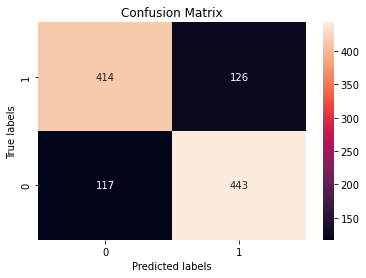

In [20]:
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation
print("Confusion Matrix for Validation set using RF classifer STANDARDIZED DATA:\n",)
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['0', '1']); ax.yaxis.set_ticklabels(['1', '0']);

Random Forest, AUC=0.8626


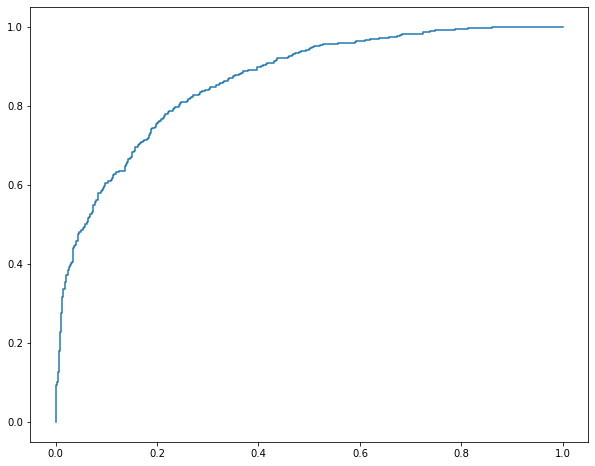

In [21]:
plt.figure(figsize = (10,8))
dt_probs = rf.predict_proba(X_test)
dt_probs = dt_probs[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, dt_probs)
auc = round(metrics.roc_auc_score(y_test, dt_probs), 4)
plt.plot(fpr,tpr)
print("Random Forest, AUC="+str(auc))

Text(0.5, 0, 'Random Forest Feature Importance')

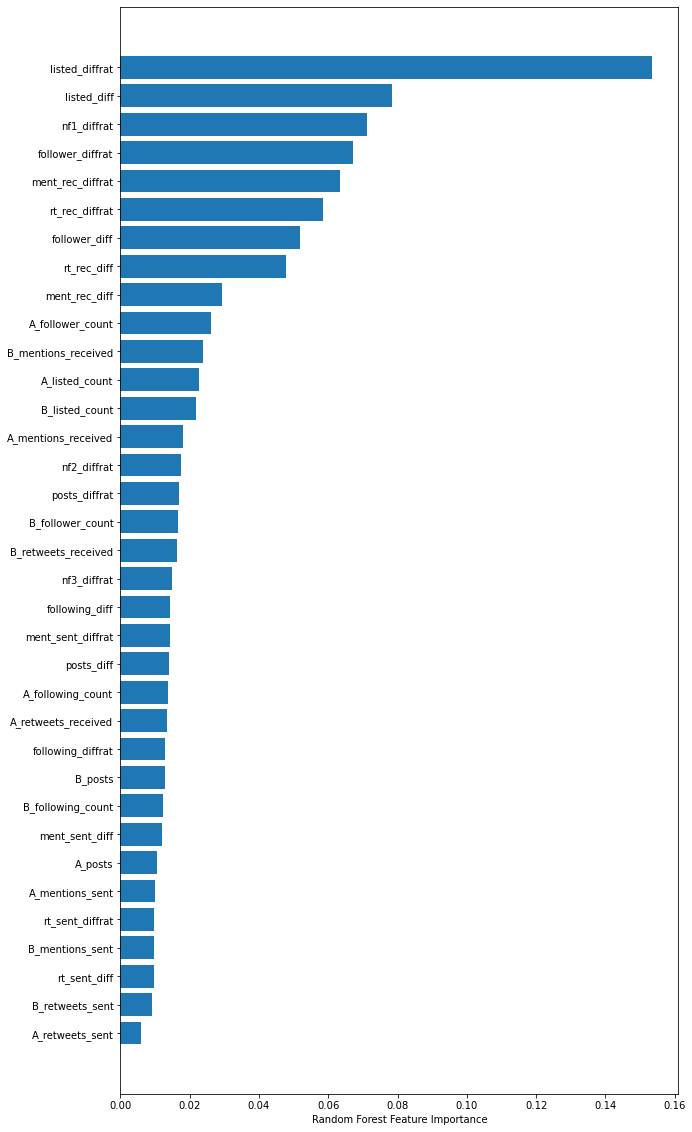

In [22]:
plt.figure(figsize = (10,20))
sorted_idx = rf.feature_importances_.argsort()
plt.barh(X.columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

In [23]:
print("Accuracy Score for Test set using Random Forest classifer:",round(accuracy_score(y_test, ypred)*100,2))

Accuracy Score for Test set using Random Forest classifer: 77.91


Some of the most indicative features of being an influencer are:
* Listed Count
* Follower Count
* Mentions Received
* Retweets Recieved
* Degree
* Betweenness
* Closeness

Followed by :

* Number of Posts
* Mentions Sent
* Following Count
* Retweets Sent

To determine the weights of these predictors, we move ahead with logistic regression. First we'll check if the logistic regression give better/similar results as Random Forest Classifier.

In [24]:
train = feat_eng(train)
train.head()

,Choice,A_follower_count,A_following_count,A_listed_count,A_mentions_received,A_retweets_received,A_mentions_sent,A_retweets_sent,A_posts,A_network_feature_1,...,following_diffrat,listed_diffrat,ment_rec_diffrat,rt_rec_diffrat,ment_sent_diffrat,rt_sent_diffrat,posts_diffrat,nf1_diffrat,nf2_diffrat,nf3_diffrat
0,0,228,302,3,0.583979,0.100503,0.100503,0.100503,0.362150,2,...,-0.979940,-0.996454,-0.927069,-0.950788,-0.975796,-0.535702,-0.901469,-0.941176,0.375861,0.711135
1,0,21591,1179,228,90.456506,25.798292,5.709329,1.111159,5.176620,369,...,0.163296,-0.751904,0.381527,0.485140,0.277683,0.326360,0.657330,0.387218,-0.754868,-0.375691
2,0,7310,1215,101,25.503644,9.556347,5.361519,0.591206,3.589718,95,...,0.431939,-0.342020,0.943998,0.928486,0.797743,0.709406,0.712276,0.938776,0.739259,0.911638
3,0,20,7,2,7.690824,0.277306,1.331508,0.100503,2.830627,6,...,-0.999207,-0.985714,-0.973506,-0.998580,-0.907802,-0.972344,-0.837938,-0.993213,-0.842948,-0.871091
4,1,45589,862,2641,148.854279,36.998884,27.881768,3.333492,23.861282,551,...,-0.329965,0.871722,0.746540,0.823479,0.609503,0.497116,0.678922,0.732704,0.448564,0.174050


In [25]:
X = feat_eng(train)
X = X.drop(['Choice', 'A_network_feature_1', 'A_network_feature_2', 'A_network_feature_3', 'B_network_feature_1', 'B_network_feature_2', 'B_network_feature_3'],axis='columns')
y = train['Choice']
X.head()

,A_follower_count,A_following_count,A_listed_count,A_mentions_received,A_retweets_received,A_mentions_sent,A_retweets_sent,A_posts,B_follower_count,B_following_count,...,following_diffrat,listed_diffrat,ment_rec_diffrat,rt_rec_diffrat,ment_sent_diffrat,rt_sent_diffrat,posts_diffrat,nf1_diffrat,nf2_diffrat,nf3_diffrat
0,228,302,3,0.583979,0.100503,0.100503,0.100503,0.362150,34463,29808,...,-0.979940,-0.996454,-0.927069,-0.950788,-0.975796,-0.535702,-0.901469,-0.941176,0.375861,0.711135
1,21591,1179,228,90.456506,25.798292,5.709329,1.111159,5.176620,39262,848,...,0.163296,-0.751904,0.381527,0.485140,0.277683,0.326360,0.657330,0.387218,-0.754868,-0.375691
2,7310,1215,101,25.503644,9.556347,5.361519,0.591206,3.589718,3622,482,...,0.431939,-0.342020,0.943998,0.928486,0.797743,0.709406,0.712276,0.938776,0.739259,0.911638
3,20,7,2,7.690824,0.277306,1.331508,0.100503,2.830627,19562,17637,...,-0.999207,-0.985714,-0.973506,-0.998580,-0.907802,-0.972344,-0.837938,-0.993213,-0.842948,-0.871091
4,45589,862,2641,148.854279,36.998884,27.881768,3.333492,23.861282,7554,1711,...,-0.329965,0.871722,0.746540,0.823479,0.609503,0.497116,0.678922,0.732704,0.448564,0.174050


#### Standardize Feature Engineered columns

In [26]:
normalized_df=(X-X.mean())/X.std()

In [27]:
y.shape

(5500,)

In [28]:
normalized_df.head()

,A_follower_count,A_following_count,A_listed_count,A_mentions_received,A_retweets_received,A_mentions_sent,A_retweets_sent,A_posts,B_follower_count,B_following_count,...,following_diffrat,listed_diffrat,ment_rec_diffrat,rt_rec_diffrat,ment_sent_diffrat,rt_sent_diffrat,posts_diffrat,nf1_diffrat,nf2_diffrat,nf3_diffrat
0,-0.320219,-0.252138,-0.343123,-0.091391,-0.094229,-0.620955,-0.528464,-0.476683,-0.301315,0.341023,...,-1.397746,-1.288518,-1.142857,-1.171676,-1.383924,-0.853830,-1.292933,-1.156683,0.572495,1.199667
1,-0.309689,-0.234243,-0.330146,-0.088309,-0.091883,-0.031780,0.000646,-0.213757,-0.299093,-0.237546,...,0.218767,-0.975368,0.463937,0.585509,0.387195,0.516197,0.951218,0.468038,-1.145501,-0.613329
2,-0.316728,-0.233509,-0.337471,-0.090536,-0.093366,-0.068316,-0.271566,-0.300420,-0.315589,-0.244858,...,0.598624,-0.450504,1.154584,1.128043,1.122021,1.124951,1.030322,1.142633,1.124631,1.534138
3,-0.320321,-0.258157,-0.343180,-0.091147,-0.094213,-0.491645,-0.528464,-0.341876,-0.308211,0.097868,...,-1.424988,-1.274766,-1.199876,-1.230160,-1.287849,-1.547761,-1.201469,-1.220327,-1.279328,-1.439735
4,-0.297860,-0.240711,-0.190981,-0.086307,-0.090861,2.297307,1.164108,0.806646,-0.313769,-0.220305,...,-0.478694,1.103712,0.912130,0.999544,0.856045,0.787570,0.982304,0.890593,0.682958,0.303724


### Influencer Modeling - Logistic Regression

We use LASSO regularization to keep the feature space compact, since analysis in Part-2 requires scraping new data-points and certain features may not be available. So its best to keep the feature space as small as possible using LASSO regularization on Logistic Regression.

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(normalized_df, y, test_size = 0.2, random_state = 147)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4400, 35)
(1100, 35)
(4400,)
(1100,)


In [30]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import RepeatedKFold

#Define model evaluation method
cv = RepeatedKFold(n_splits = 10, n_repeats = 5, random_state = 123)

#Initialize model with L1 regularization as hyperparameter
model4 = LogisticRegressionCV(cv = cv, max_iter = 10000, n_jobs = -1, Cs=[0.01,0.1,0.5], penalty='l1', solver='saga')

#Fitting the model
model4.fit(X_train, y_train)

LogisticRegressionCV(Cs=[0.01, 0.1, 0.5],
                     cv=RepeatedKFold(n_repeats=5, n_splits=10, random_state=123),
                     max_iter=10000, n_jobs=-1, penalty='l1', solver='saga')

In [31]:
print('Best inverse regularization hyperparameter fir LogisticCV with LASSO penalty: ', str(model4.C_))

Best inverse regularization hyperparameter fir LogisticCV with LASSO penalty:  [0.1]


In [32]:
print('Most important feature from Logistic Regression')
coeff_parameter = pd.DataFrame(model4.coef_.transpose(), X.columns, columns = ['Coefficient'])
coeff_parameter = coeff_parameter[coeff_parameter['Coefficient'] > 0].sort_values('Coefficient', ascending=False)
coeff_parameter

Most important feature from Logistic Regression


,Coefficient
listed_diffrat,0.560528
follower_diffrat,0.399779
nf1_diffrat,0.281095
nf2_diffrat,0.236246
rt_rec_diffrat,0.235237
ment_sent_diffrat,0.185465
rt_sent_diffrat,0.120438
B_posts,0.096695
listed_diff,0.094690
posts_diffrat,0.022672


In [33]:
#Predicting the test data using the model
predictions4 = model4.predict(X_test)
predictions4

array([0, 0, 1, ..., 0, 0, 1])

In [34]:
def regression_results(y_true, y_pred):
    # Regression metrics
    explained_variance = metrics.explained_variance_score(y_true, y_pred)
    accuracy = metrics.accuracy_score(y_true, y_pred)
    mean_absolute_error = metrics.mean_absolute_error(y_true, y_pred) 
    mse = metrics.mean_squared_error(y_true, y_pred) 
    median_absolute_error = metrics.median_absolute_error(y_true, y_pred)
    r2 = metrics.r2_score(y_true, y_pred)
    cf_mat = pd.DataFrame(metrics.confusion_matrix(y_true, y_pred))

    print('Explained Variance: ', round(explained_variance, 4))
    print('Accuracy: ', round(accuracy, 4))
    print('R2: ', round(r2, 4))
    print('MAE: ', round(mean_absolute_error, 4))
    print('MSE: ', round(mse, 4))
    print('RMSE: ', round(np.sqrt(mse), 4))
    print('Confusion Matrix: \n', cf_mat)

In [35]:
regression_results(y_test, predictions4)

Explained Variance:  0.1085
Accuracy:  0.7773
R2:  0.1068
MAE:  0.2227
MSE:  0.2227
RMSE:  0.4719
Confusion Matrix: 
      0    1
0  411  111
1  134  444


### Financial Value of the model

`A retailer wants influencers to tweet its promotion for a product. If a non-influencer
tweets, there is no benefit to the retailer. If an influencer tweets once, there is a
0.01% chance that his/her followers will buy one unit of a product. Assume the
retailer has a profit margin of $10 per unit, and that one customer can buy only one
unit. If an influencer tweets twice, the overall buying probability will be 0.015%.
Without analytics, the retailer offers $5 to each person (A and B) to tweet once. With
analytics, the retailer offers $10 to those identified as influencers by the model to
send two tweets each. If the model classifies an individual as a non-influencer, s/he
is not selected/paid by the retailer to tweet`



In [36]:
df = pd.read_csv('./train.csv')

y_choice = model4.predict(normalized_df)
y_choice = [round(num) for num in y_choice]
df['Choice'] = y_choice

cost = 0
rev = 0
followers = 0 
for row in range(len(df)):
    cost += 10
    if df.loc[row,'Choice'] == 1:
        rev += df.loc[row,'A_follower_count'] * 10 * 0.00015
        followers += df.loc[row,'A_follower_count']
    else:
        rev += df.loc[row,'B_follower_count'] * 10 * 0.00015
        followers += df.loc[row,'B_follower_count']
profit = rev - cost
print('Sum of followers of predicted influencers: ', followers)
print('Net Profit with our analytical model: $', round(profit,2))

Sum of followers of predicted influencers:  6236454962
Net Profit with our analytical model: $ 9299682.44


In [37]:
df = pd.read_csv('./train.csv')

cost = 0
rev = 0
followers = 0
for row in range(len(df)):
    cost += 10
    if df.loc[row,'Choice'] == 1:
        rev += df.loc[row,'A_follower_count'] * 10 * 0.00015
        followers += df.loc[row,'A_follower_count']
    else:
        rev += df.loc[row,'B_follower_count'] * 10 * 0.00015
        followers += df.loc[row,'B_follower_count']
profit = rev - cost
print('Sum of followers of labeled Influencers from training data: ', followers)
print('Net Profit with perfect analytical model: $', round(profit,2))

Sum of followers of labeled Influencers from training data:  5376568593
Net Profit with perfect analytical model: $ 8009852.89


In [38]:
df = pd.read_csv('./train.csv')

cost = 0
rev = 0
followers = 0
for row in range(len(df)):
    cost += 10
    if df.loc[row,'Choice'] == 1:
        rev += df.loc[row,'A_follower_count'] * 10 * 0.0001
        followers += df.loc[row,'A_follower_count']
    else:
        rev += df.loc[row,'B_follower_count'] * 10 * 0.0001
        followers += df.loc[row,'B_follower_count']
profit = rev - cost
print('Sum of followers of all persons: ', followers)
print('Net Profit without using analytics: $', round(profit,2))

Sum of followers of all persons:  5376568593
Net Profit without using analytics: $ 5321568.59


Note that we assume a perfect analytical model is the one that can predict influencers with 100% accuracy. This means that the model does not always select the influener as person with the most followers.

Net Profit with analytical model = Sum of followers of predicted influencers * Profit Margin * Buying Probability of tweeting twice - Cost for influencers * Number of predicted influencers

= 6236583679 * 10 * 0.00015 - 10 * 5500

= 9299875.5185


Net Profit with perfect anaytical model = Sum of followers of labeled Influencers from training data * 10 * 0.00015

= 5376568593 * 10 * 0.00015 - 10 * 5500

= 8009852.89


Net Profit without analytics = Sum of followers of all persons * Profit Margin * Buying Probability of tweeting once - Cost for each person * Number of persons

= 5376568593 * 10 * 0.0001 - 5 * 11000

= 5321568.59


Lift in Net Profit from our analytical model

= 9299875.5185 - 5321568.59

= 3978306.9285


Lift in Net Profit from our perfect analytical model

= 8009852.89 - 5321568.59

= 2688284.3

Lift in Net Profit from our analytical model is more than perfect analytical model because our model's predicted influencers have more followers than labeled influencer's followers. Since Lift in Net Profit is proportional to number of followers (refer formula), our analytical model results in higher Lift in Net Profit than perfect analytical model.

<AxesSubplot:title={'center':'Cumulative Gains Curve'}, xlabel='Percentage of sample', ylabel='Gain'>

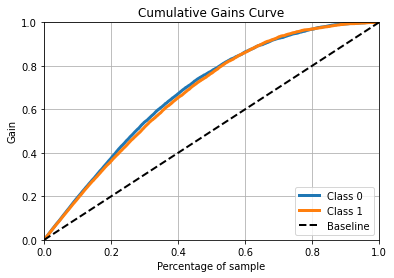

In [39]:
#Predicting the probability and plotting lift

predictions = model4.predict_proba(normalized_df)
skplt.metrics.plot_cumulative_gain(y, predictions)

The above cumulative gains curve shows that we obtain the best gain by contacting the top 50% of the influencers that our model predicts, since we get maximum separation from the baseline arounf 0.5 mark.

In [43]:
import tweepy
from tweepy import *
import pandas as pd
import time
import re
import numpy as np
import warnings
warnings.filterwarnings("ignore")

## Scraping tweets on "Austin" from twitter
### The scraped data is saved into a csv file. Directly reading from the data file as re-scraping twitter changes our analysis

##############################################################################################################################

In [ ]:
# Credentials for scraping twitter
bearer_token="AAAAAAAAAAAAAAAAAAAAAPablQEAAAAAaM6udljXUe3ypzhh%2Brx%2BUB2%2B9MA%3DNn9wQgX4yOKBDf9Hpf6FAbCRBmbhVDfU8MARl5mCYxhsHAA30m"
consumer_key = "ZmVEhabWyVWyW2AKnaMDRcPx8"
consumer_secret = "BwxLn0TL4ZOuwThoPtuT5ycT5Rwi52xr3cG1uUMHSzoRWklAD2"
access_token = "826471220514324484-E6sag0oLoI8uowbZdITlFTjLb4h4Xv0"
access_token_secret = "kf6hgQbG1qX2HHtKxN3CQ1UtzjUiBwT81QnoF21WxdTM3"

authorization = tweepy.OAuth2AppHandler(consumer_key, consumer_secret)
api = tweepy.API(authorization,wait_on_rate_limit=True)

In [ ]:
#create a twitter cursor obj
tweets_obj = tweepy.Cursor(api.search_tweets,q="austin", lang = "en", tweet_mode='extended').items(5000)

#fetch only required columns
tweets_list = [[tweet.full_text, tweet.user, tweet.retweet_count] for tweet in tweets_obj]
df_for_graph=pd.DataFrame()
entire_data_df=pd.DataFrame()


In [ ]:
# converting json data to dataframe
for tweet in tweets_list:

  dict1=tweet[1]._json
  dict2={'Tweet': tweet[0],'Retweet_count': tweet[2] }
  merged_dict={**dict1,**dict2}
  entire_data_df = entire_data_df.append(merged_dict, ignore_index = True)

  temp_df = {'Tweeter': '@'+tweet[1].screen_name, 'Tweet': tweet[0]}
  df_for_graph = df_for_graph.append(temp_df, ignore_index = True)

df_for_graph.to_csv('df_for_graph.csv')
entire_data_df.to_csv('entire_data_df.csv')

In [40]:
entire_data_df=pd.read_csv('df_for_graph.csv')

#########################################################################################################################

In [41]:
# reseting index on the read data
df_for_graph=pd.read_csv('df_for_graph.csv')
entire_data_df=pd.read_csv('entire_data_df.csv')
df_for_graph.drop(['Unnamed: 0'], axis=1, inplace=True)
entire_data_df.drop(['Unnamed: 0'], axis=1, inplace=True)
entire_data_df.fillna(0)
df_for_graph.fillna(0)

,Tweeter,Tweet
0,@MortifiedPengu4,RT @amuse: Austin Democrats fought for the rig...
1,@srart25,"RT @sewellchan: ICYMI: Pence, Haley, Scott, Ke..."
2,@ITalkSportsAR,RT @AndyKHLiu: Steph saw Austin Rivers’ little...
3,@xandria_austin,Read. Every to hurt you\n؟?\nنمشے\n\n🔹H4🔹\n🔹H4...
4,@austin_medz,@Sha_Shox @JamesGunn This guy liked his own tw...
...,...,...
4995,@BookSpotlight,RT @katkinneywrites: 🔥Seven brothers\n🔥Set in ...
4996,@tuckerfan69420,@tymetwx @HKronberg he's referring to the time...
4997,@Ohio_Texan,@finebaum Buddy Guy and Junior Wells at Antone...
4998,@siphaphathnthi1,RT @asianewsteam: Charlotte Austin ชาล็อต ออสต...


In [44]:
#code for graph edges

#fetch mentioned user
df_for_graph['Mentioned_user'] = df_for_graph.apply(lambda row : ", ".join(re.findall(r'@\w+',row['Tweet'])), axis = 1)
df_for_graph.Mentioned_user = df_for_graph.Mentioned_user.str.split(', ')

#unpivot the mentioned users
df_for_graph = df_for_graph.explode('Mentioned_user', ignore_index=True)


#mark the type i.e. Tweet, Tweet(Self) or retweet
df_for_graph['Type'] = np.where(df_for_graph['Tweet'].astype(str).str[0:2] == "RT", "RT", np.where(df_for_graph['Tweeter'] == df_for_graph['Mentioned_user'], "Tweet(Self)", "Tweet"))
df_for_graph=df_for_graph[['Tweeter','Mentioned_user','Type']]
df_for_graph[:5]


,Tweeter,Mentioned_user,Type
0,@MortifiedPengu4,@amuse,RT
1,@srart25,@sewellchan,RT
2,@ITalkSportsAR,@AndyKHLiu,RT
3,@xandria_austin,,Tweet
4,@austin_medz,@Sha_Shox,Tweet


In [45]:
import networkx as nx
import matplotlib.pyplot as plt

In [46]:
G = nx.from_pandas_edgelist(df_for_graph, source = 'Tweeter', target = 'Mentioned_user')

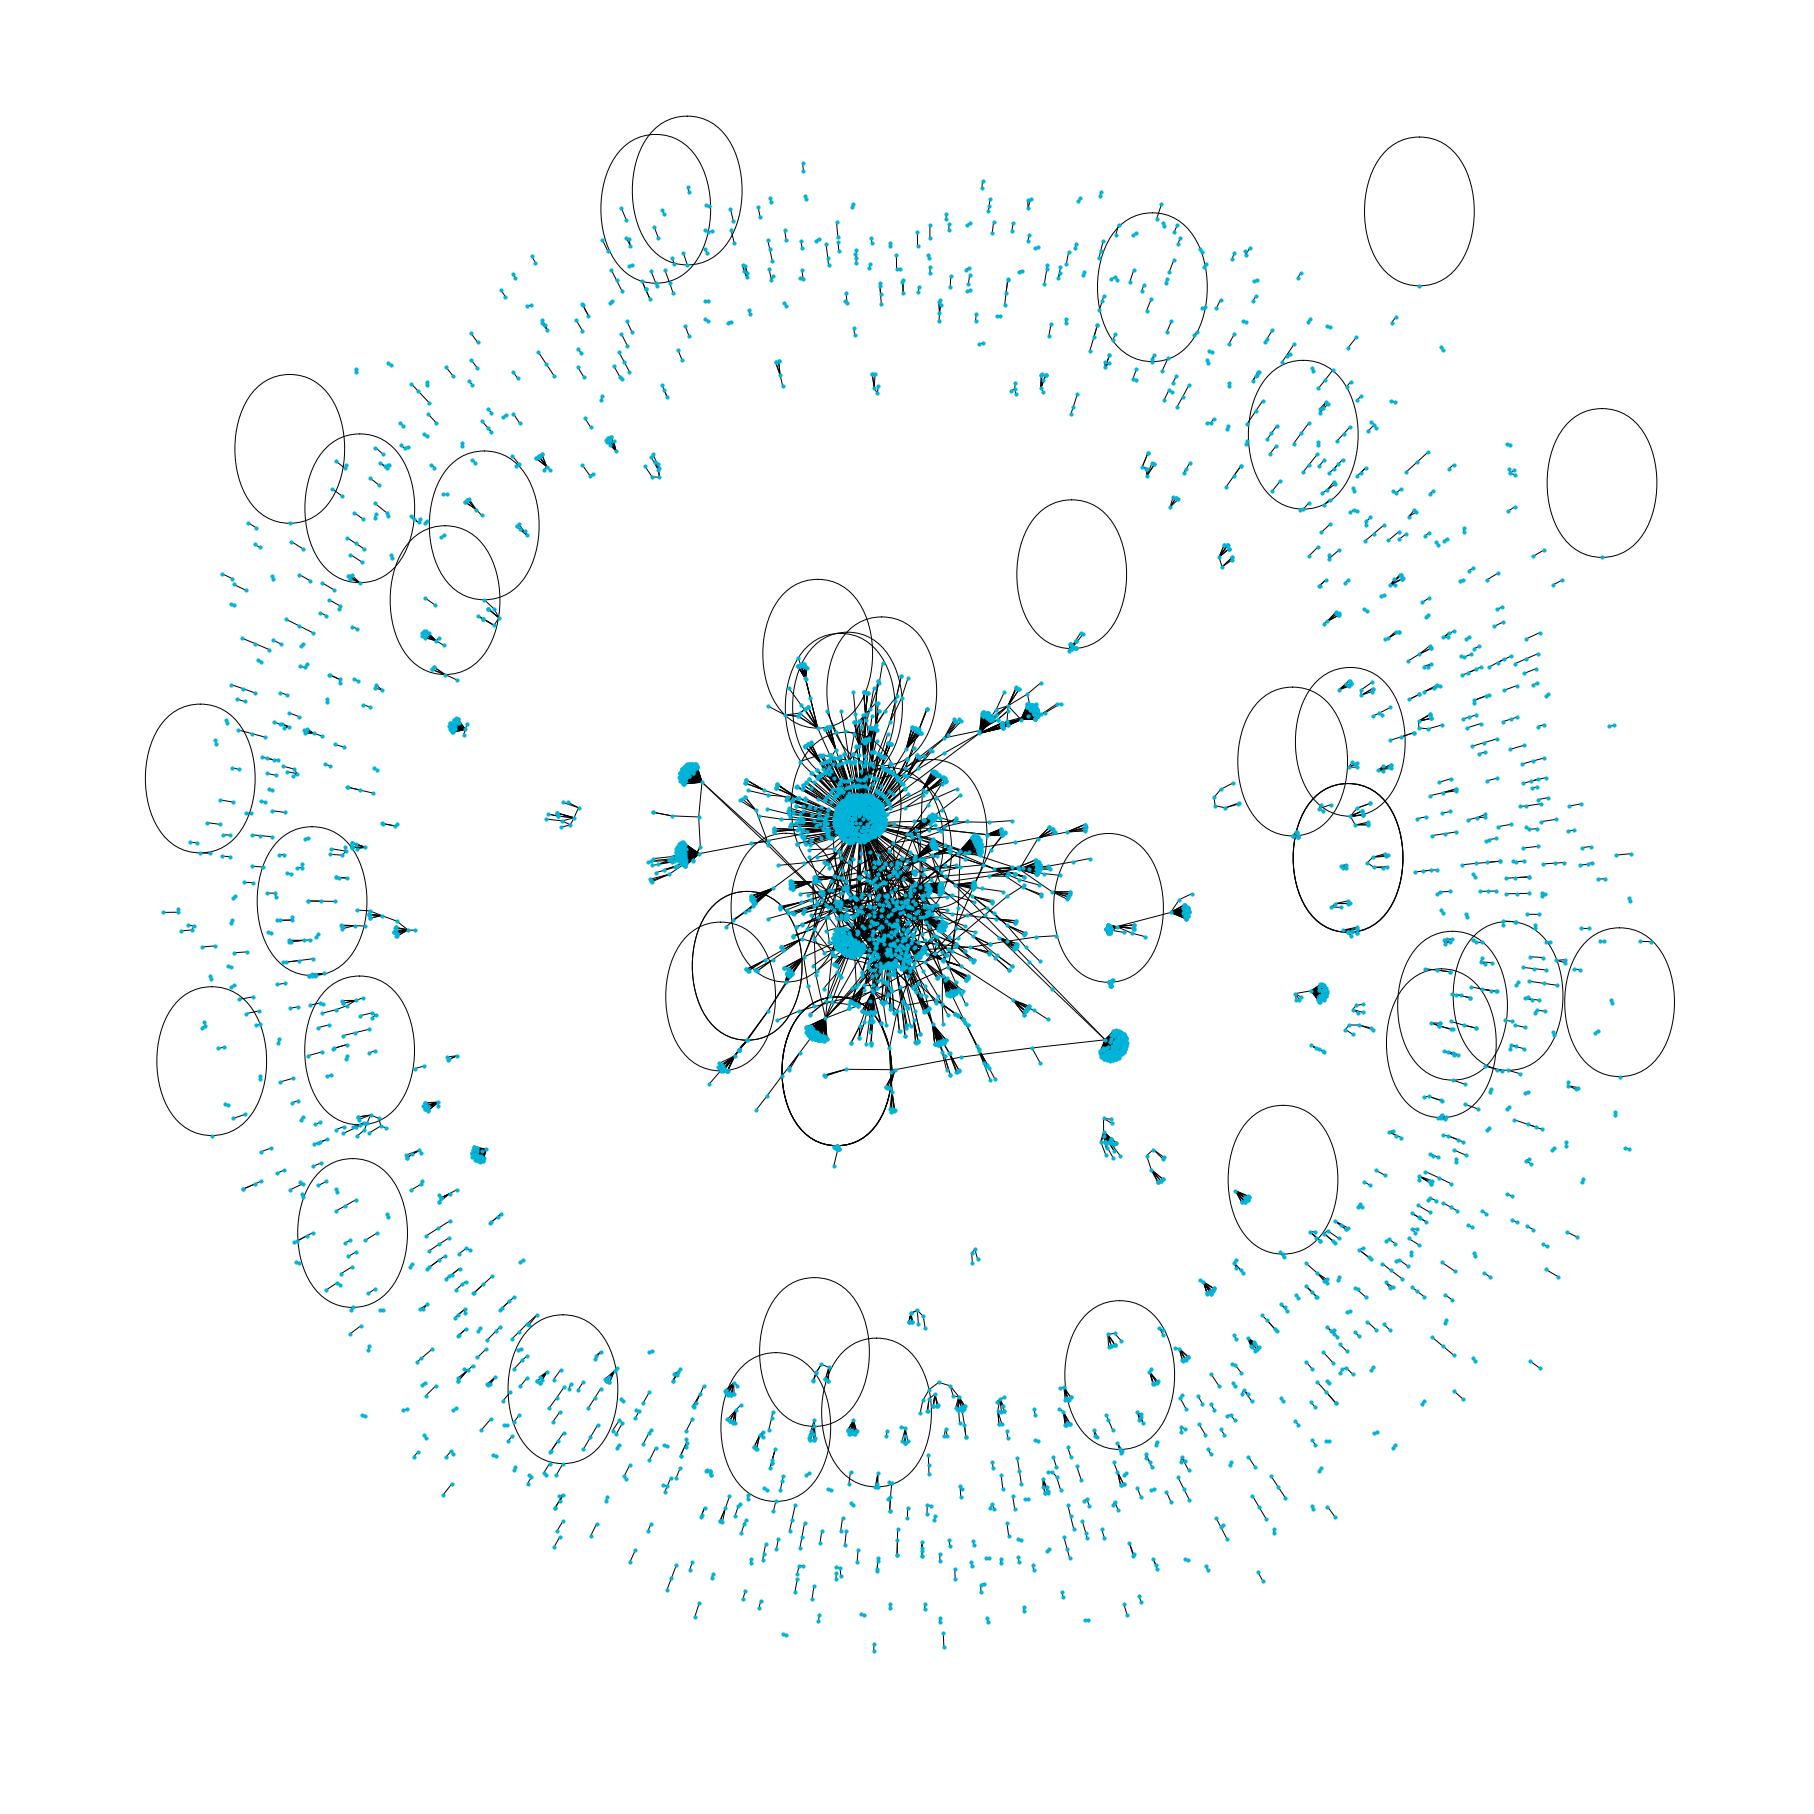

In [47]:
# plotting the newtwork
from matplotlib.pyplot import figure
figure(figsize=(25, 25))
nx.draw(G, with_labels=False, node_size=10, node_color='#00b4d9')

We can see that the most influencial accounts are highlighted in blue in the center of the graph and they have the most nodes attached to them. We also see a few black circles which represent self-retweets and multiple small clusters at the periphery of the network.

In [48]:
# Calculating the centrality, betweenness, and closeness
degree = nx.degree_centrality(G)
betweenness = nx.betweenness_centrality(G)
closeness = nx.closeness_centrality(G)
centrality_df = pd.DataFrame(degree,index=['degree']).T
centrality_df['betweenness'] = pd.DataFrame(betweenness,index=['betweenness']).T.betweenness
centrality_df['closeness'] = pd.DataFrame(closeness,index=['closeness']).T.closeness
centrality_df = centrality_df.reset_index().rename(columns={'index':'name'})
centrality_df.to_csv('centrality_df.csv')


In [2]:
centrality_df=pd.read_csv('centrality_df.csv')
centrality_df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [3]:
centrality_df

,name,degree,betweenness,closeness
0,@MortifiedPengu4,0.000169,0.000000e+00,0.116579
1,@amuse,0.003547,6.509596e-03,0.150330
2,@srart25,0.000169,0.000000e+00,0.080393
3,@sewellchan,0.001520,1.401122e-03,0.095120
4,@ITalkSportsAR,0.000169,0.000000e+00,0.115165
...,...,...,...,...
5916,@tuckerfan69420,0.000338,6.932256e-06,0.119676
5917,@Ohio_Texan,0.000169,0.000000e+00,0.000169
5918,@finebaum,0.000169,0.000000e+00,0.000169
5919,@siphaphathnthi1,0.000338,2.024948e-08,0.096239


To understand the importance of nodes, we tabulate the three centrality measures - degree, betweenness and closeness. These centrality measures provide insights into the influence, popularity, and accessibility of individuals or entities in the social network.

### Creating some intermediatary dataframes for analysis, can read files directly which are uploaded

############################################################################################################################

In [50]:
# Reconfiguring data types, engineering required columns
df_for_model=entire_data_df[['screen_name','listed_count','followers_count','Retweet_count']]
df_for_model['listed_count']= np.where(df_for_model['listed_count']=="False",0,df_for_model['listed_count'])
df_for_model['listed_count'] = df_for_model['listed_count'].astype(float)
df_for_model['followers_count'] = df_for_model['followers_count'].astype(float)
df_for_model['Retweet_count'] = df_for_model['Retweet_count'].astype(float)
df_for_model=pd.DataFrame(df_for_model.groupby(['screen_name', 'listed_count','followers_count'], as_index=False)['Retweet_count'].sum())
df_for_model['screen_name'] = df_for_model['screen_name'].str.replace('@', '')
centrality_df['name'] = centrality_df['name'].str.replace('@', '')
df_for_model=df_for_model.merge(centrality_df, left_on='screen_name', right_on='name', how='left')
df_for_model.drop(['name'], axis=1, inplace=True)

In [51]:
df_for_model.to_csv('df_for_model_mid.csv')

In [52]:
# cross join and remove matching to get n*n-1 records to apply model coefficients found in part I

df1=df_for_model
df2=df_for_model
df1['key'] = 0
df2['key'] = 0
df1=df1.merge(df2, on='key')

#remove columns where screen_names are equal
df_for_model=df1[df1['screen_name_x']!=df1['screen_name_y']]
df_for_model['listed_diffrat']= ((df_for_model['listed_count_x'] - df_for_model['listed_count_y']) / (df_for_model['listed_count_x'] + df_for_model['listed_count_y']))
df_for_model['follower_diffrat']= ((df_for_model['followers_count_x'] - df_for_model['followers_count_y']) / (df_for_model['followers_count_x'] + df_for_model['followers_count_y']))
#df_for_model['listed_ratio']= (df_for_model['listed_count_x'] / df_for_model['listed_count_y'])
df_for_model['listed_diff'] = (df_for_model['listed_count_x'] - df_for_model['listed_count_y'])
df_for_model.drop(['key'], axis=1, inplace=True)

df_for_model['nf1_diffrat'] = ((df_for_model['degree_x'] - df_for_model['degree_y']) / (df_for_model['degree_x'] + df_for_model['degree_y']))
df_for_model['nf2_diffrat'] = ((df_for_model['betweenness_x'] - df_for_model['betweenness_y']) / (df_for_model['betweenness_x'] + df_for_model['betweenness_y']))
df_for_model['nf3_diffrat'] = ((df_for_model['closeness_x'] - df_for_model['closeness_y']) / (df_for_model['closeness_x'] + df_for_model['closeness_y']))

df_for_model.drop(['degree_x','degree_y','betweenness_x','betweenness_y','closeness_x','closeness_y'], axis=1, inplace=True)
df_for_model=df_for_model.fillna(0)

df_for_model.to_csv('df_for_model.csv')

In [ ]:
df_for_model=pd.read_csv('df_for_model.csv')

In [ ]:
# resetting index
df_for_model.drop(['Unnamed: 0'], axis=1, inplace=True)

In [ ]:
# removing duplicates user combinations
def func(row):
    x = [row['screen_name_x'], row['screen_name_y']]
    x.sort()
    return str(x)

df_for_model['combined_name']= df_for_model.apply(func, axis=1)

In [ ]:
dedup_df=df_for_model.drop_duplicates(subset='combined_name',keep='last')
dedup_df.shape

In [ ]:
## Final data File to generate scores
dedup_df.to_csv('DataForScore.csv')

##########################################################################################################################

## Reading csv with cleaned data to compute scores 

In [54]:
dedup_df=pd.read_csv('DataForScore.csv')

In [55]:
# normalizing the numerical values
normalized_df=(dedup_df[['listed_diffrat', 'follower_diffrat','nf1_diffrat','nf2_diffrat','nf3_diffrat']]-dedup_df[['listed_diffrat', 'follower_diffrat','nf1_diffrat','nf2_diffrat','nf3_diffrat']].mean())/dedup_df[['listed_diffrat', 'follower_diffrat','nf1_diffrat','nf2_diffrat','nf3_diffrat']].std()
norm_df = pd.concat([normalized_df, dedup_df['screen_name_x'],dedup_df['screen_name_y']], axis=1)
norm_df

,listed_diffrat,follower_diffrat,nf1_diffrat,nf2_diffrat,nf3_diffrat,screen_name_x,screen_name_y
0,1.251521,1.356018,-1.817197,-1.413961,1.128403,08wvdcfan,07kanamiyu
1,1.251521,1.282430,0.008905,0.660284,0.001708,0x0000DIN0,07kanamiyu
2,-0.721720,-1.093051,1.835008,1.423208,-1.180399,0x0000DIN0,08wvdcfan
3,1.251521,1.362903,-0.295445,0.001526,-0.298260,0xGanon,07kanamiyu
4,-0.666907,1.080341,1.652398,1.423208,-1.260316,0xGanon,08wvdcfan
...,...,...,...,...,...,...,...
7548550,-0.627756,-0.097854,-2.232220,-1.413961,-0.105901,zjones20,yweldon
7548551,0.840429,0.864182,0.008905,0.004624,-0.207825,zjones20,zak_snak
7548552,-0.187300,1.086411,0.008905,0.004624,-0.029867,zjones20,zelosq
7548553,0.840429,-0.813330,-1.360671,-1.413961,-0.078588,zjones20,zephtx


In [56]:
#using values from the Part 1 to create influence scores
norm_df['I_Score']= coeff_parameter.iloc[0].values * norm_df[coeff_parameter.index.values[0]] + coeff_parameter.iloc[1].values * norm_df[coeff_parameter.index.values[1]] + coeff_parameter.iloc[2].values * norm_df[coeff_parameter.index.values[2]] + coeff_parameter.iloc[3].values * norm_df[coeff_parameter.index.values[3]]
norm_df['I_Score']

0          0.398770
1          1.372693
2          0.010518
3          1.163684
4          0.858787
             ...   
7548550   -1.352505
7548551    0.820161
7548552    0.332933
7548553   -0.570590
7548554   -1.013483
Name: I_Score, Length: 7548555, dtype: float64

In [57]:
sorted_norm_df=norm_df.sort_values('I_Score',ascending=False)

In [58]:
sorted_norm_df

,listed_diffrat,follower_diffrat,nf1_diffrat,nf2_diffrat,nf3_diffrat,screen_name_x,screen_name_y,I_Score
249711,1.251521,1.363827,2.669798,1.423208,0.367897,EvilMopacATX,AmyS04465264,2.333437
250118,1.251521,1.363827,2.669798,1.423208,-0.000702,EvilMopacATX,DanicaPhipps14,2.333437
250234,1.251521,1.363827,2.669798,1.423208,1.354808,EvilMopacATX,Ed28540697,2.333437
249623,1.251521,1.363827,2.669798,1.423208,1.223394,EvilMopacATX,80Coepri,2.333437
249811,1.251521,1.363772,2.669798,1.423208,-0.000702,EvilMopacATX,Austin__Dean,2.333415
...,...,...,...,...,...,...,...,...
1711032,-1.215030,-1.322264,-2.651987,-1.413961,-0.284157,StevenWeigand2,EvilMopacATX,-2.289175
800187,-1.215030,-1.322264,-2.651987,-1.413961,-1.413022,MRotaucrot,EvilMopacATX,-2.289175
2713992,-1.215030,-1.322264,-2.651987,-1.413961,-1.414567,austin_mcgill31,EvilMopacATX,-2.289175
5623688,-1.215030,-1.322264,-2.651987,-1.413961,-1.395674,notahumancat,EvilMopacATX,-2.289175


In [59]:
top20_influencers=pd.DataFrame(sorted_norm_df.groupby('screen_name_x')['I_Score'].mean().sort_values(ascending=False)[:20])

In [60]:
# Listing the top 20 influencers in the network
top20_influencers

,I_Score
screen_name_x,
TheNBACentral,2.252311
KXAN_News,2.242423
KVUE,2.218255
Asmongold,2.207233
Austin_Police,2.206657
TexasTribune,2.204913
2000s_WWE,2.184536
CreationEnt,2.161021
statesman,2.156998


Our top 20 influencers are:

TheNBACentral: This Twitter account is popular among basketball fans in Austin, providing news and analysis on the National Basketball Association.

KXAN_News: This is the official Twitter account of KXAN-TV, the NBC affiliate in Austin, providing local news, weather, and traffic updates.

KVUE: This is the official Twitter account of KVUE-TV, the ABC affiliate in Austin, providing local news, weather, and traffic updates.

Asmongold: This Twitter account belongs to a popular Twitch streamer and YouTuber who is based in Austin and focuses on World of Warcraft content.

Austin_Police: This is the official Twitter account of the Austin Police Department, providing updates on local law enforcement activity and community outreach.

TexasTribune: This Twitter account belongs to a non-profit, non-partisan news organization that covers Texas politics and policy.

2000s_WWE: This Twitter account provides news and analysis on the World Wrestling Entertainment (WWE) events of the 2000s.

CreationEnt: This Twitter account belongs to a leading independent entertainment company that provides high-quality live events in Austin and other cities.

statesman: This Twitter account belongs to the Austin American-Statesman, the largest daily newspaper in Austin, providing local news and analysis.

austin_visual: This Twitter account showcases the visual arts scene in Austin, including exhibitions, events, and artist profiles.

thedailybeast: This Twitter account belongs to The Daily Beast, a news and opinion website that covers national and international news.

KXAN_Weather: This is the official Twitter account of the weather team at KXAN-TV, providing up-to-date weather forecasts for Austin and surrounding areas.

EvilMopacATX: This Twitter account provides commentary and satire on local Austin issues and events.

fox7austin: This is the official Twitter account of FOX 7 Austin, providing local news, weather, and traffic updates.

tplohetski: This Twitter account belongs to Tony Plohetski, an investigative reporter at the Austin American-Statesman.

BrandonHuffman: This Twitter account belongs to Brandon Huffman, a journalist and editor who covers high school and college football.

spann: This Twitter account belongs to James Spann, a well-known meteorologist and weather forecaster based in Austin.

Austin_Federa: This Twitter account provides news and analysis on the Austin chapter of the Federal Reserve Bank of Dallas.

mattlargey: This Twitter account belongs to Matt Largey, a journalist and radio host based in Austin.

TCEA: This Twitter account belongs to the Texas Computer Education Association, a professional organization that supports technology education in Texas.    

We see that news channels like KXAN News, KVUE, the daily beast, texas tribune, fox 7 austin, are among the top 20 influencers in Austin. 
Among the top 20 we also have "tplohetski" is a news reporter and "spann" is a meterologist. This is expected as with the current winter storm, these channel received a lot retweets on the updates that they shared. 
UT Police and KXAN_weather has sent out multiple tweets regarding the winter storm and resources for citizens and this is being publicised among the community by other users.
We also see some popular sports entity among our top 20 like The NBA Central and 2000s_WWE. 

In [ ]:
sorted_norm_df['nf1_diffrat,nf2_diffrat,nf3_diffrat,screen_name_x']

In [76]:
filter2 = sorted_norm_df["screen_name_x"].isin(top20_influencers.index)
df_to_verify=sorted_norm_df[['nf1_diffrat','nf2_diffrat','nf3_diffrat','screen_name_x']][filter2]

In [82]:
df_to_verify.groupby(by='screen_name_x').mean().sort_values(by='nf1_diffrat', ascending=False)

,nf1_diffrat,nf2_diffrat,nf3_diffrat
screen_name_x,,,
EvilMopacATX,2.589883,1.395346,0.656742
KXAN_News,2.527832,1.395004,0.642504
Asmongold,2.520989,1.368577,0.585493
TheNBACentral,2.501808,1.387718,0.618803
CreationEnt,2.487199,1.371712,0.646771
Austin_Police,2.484596,1.369357,0.646937
KVUE,2.443817,1.389333,0.651577
austin_visual,2.441148,1.394237,0.624850
KXAN_Weather,2.430586,1.370731,0.632045


Taking a look at the network features we see that degree centrality and betweenness (nf1_diffrat and nf2_diffrat) are more dominating in deciding the order of influence among the users as compared to closeness.